# **K-MEANS**

Para efetuar esse algoritmo seguimos os seguintes passos:

- 1. Inicializar os centroides aleatoriamente (centros de um cluster)
- 2. Para cada ponto na base de dados, calcular a `distância` para cada centroide e associar ao que estiver perto.
- 3. Calcular a média de todos os pontos ligados a cada centroide e definir um novo centroide.
- 4. Repita 2 e 3, até que não tenha mais atualizações para fazer.

O valor de `K` define a quantidade de grupos que serão encontrados. Para definir o valor de `K`: 
- Método 1: utilize a equação: $K=\sqrt{N\over2}$, em que `N` é o número total de registros.
- Método 2: Utilize o método de Elbow.

![](https://sandipanweb.files.wordpress.com/2017/03/kmeans3.gif?w=676)


Fonte: https://sandipanweb.wordpress.com/2017/03/19/hard-soft-clustering-with-k-means-weighted-k-means-and-gmm-em/

---
- Links para aprender mais:
    - [K-Means Clustering - The Math of Intelligence - Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk).
    - [K-Means Clustering - Cognitive Class](https://youtu.be/wWESal01T-w)
    - [More on K-Means - Cognitive Class](https://youtu.be/OUyfpK6Prj4)
    - [Entendendo como funciona o algoritmo de Cluster K-Means - Diego Nogare](http://www.diegonogare.net/2015/08/entendendo-como-funciona-o-algoritmo-de-cluster-k-means/)
    - [Hard & Soft Clustering with K-means, Weighted K-means and GMM-EM in Python - SANDIPANWEB](https://sandipanweb.wordpress.com/2017/03/19/hard-soft-clustering-with-k-means-weighted-k-means-and-gmm-em/)
---

# **IMPLEMENTAÇÃO**
Para a implementação do algoritmo foi utilizada a biblioteca sklearn, veja a [Documentação](https://scikit-learn.org/stable/modules/classes.html#)

## EXEMPLO SIMPLES
Para um primeiro exemplo vamos gerar uma base de dados pequena, serão 1000 amostras divididas de forma que fique centradas em 5 centros diferentes.

In [1]:
#-----Criando uma base aleatória com 200 amostras e divididas em 5 centros----#
from sklearn.datasets import make_blobs
base, clusters_correto = make_blobs(n_samples = 1000, centers = 5)

Como estamos trabalhando com um algoritmo que tem como base a distância entre pontos, é importante efetuar o escalonamento dos dados.

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
base = scaler.fit_transform(base)

Agora pode-se criar o agrupador e efetuar as previsões.

> OBS.: nesse caso, como a base de dados foi gerada por make_blobs, já possuímos as respostas corretas, mas lembre-se, esse algoritmo é do tipo aprendizagem não supervisionada.

In [3]:
#-------------------Definindo o agrupador kmeans para 5 clusters--------------#
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(base)

#-------------------Efetuar a previsão para cada registro---------------------#
previsoes = kmeans.predict(base)

Para melhor visualização dos resultados é possível plotá-los com o auxilio da biblioteca matplotlib.

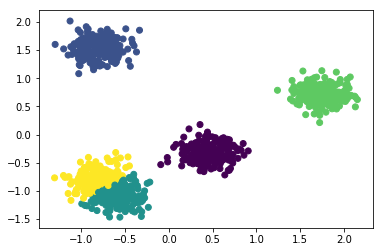

In [4]:
#------------------Exibindo os clusters de forma colorida---------------------#
import matplotlib.pyplot as plt
plt.scatter(base[:,0], base[:,1], c = previsoes)

## EXEMPLO REAL

### **Base de dados**
A base de dados que irei utilizar é a credit_card_clients.csv

> OBS.: Se tiver duvidas de como inserir uma base de dados no kaggle, nesse kernel [aqui](https://www.kaggle.com/lucasfdutra/regras-de-associa-o?scriptVersionId=10604491) (mais ou menos na metade dele) eu mostrei como fazer isso.    
### **Trabalhando a base de dados**

In [5]:
import pandas as pd
#----------------Coloca a base de dados na variável 'base'--------------------#
base = pd.read_csv('../input/credit_card_clients.csv', header = 1)

#--------------------------Somando as dividas---------------------------------#
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

#----------------Definindo os previsores e os escalonando---------------------#
X = base.iloc[:,[1,2,3,4,5,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### **Definindo o valor de K**
Agora vamos definir qual o valor `ideal` para o k. Para isso vamos traçar a curva de Elbow, e verificar aquele valor para o qual já não há mais muita variação na curva.

Text(0,0.5,'WCSS')

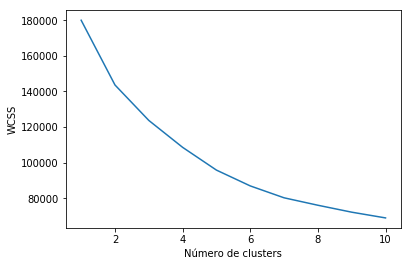

In [6]:
#------Criando varios agrupadores com quantidades diferentes de clusters-----#
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

Eu escolherei o valor de k=6.

### **Construindo modelo**
Agora com o valor de `k` já definido, podemos efetuar o treinamento e verificar as previsões do nosso método. Outra possibilidade é agrupar os dados de previsão à base de dados e ordená-los, para assim efetuarmos uma avaliação melhor dos dados (essa avaliação é feita de forma manual).

In [7]:
import numpy as np
#-------------------Criando agrupador final com 6 clusters--------------------#
kmeans = KMeans(n_clusters = 6, random_state = 0)
kmeans.fit(X)

#-------------------Prevendo os clusters para cada registro-------------------#
previsoes = kmeans.predict(X)

#-Agrupando a previsão à base e ordenando os clientes em relação na previsão--#
# A previsão será adicionada à ultima coluna, que é a coluna 26               #
#-----------------------------------------------------------------------------#
lista_clientes = np.column_stack((base, previsoes))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]